The following file demonstrates the results visualization code used in our research:

**Imputation of missing values in well log data using k-nearest neighbor collaborative filtering**

The following python libraries are utilized in our research:

*   NumPy
*   Pandas
*   Matplotlib
*   Scikit-Learn


Important to Note:
* Run each cell sequentially unless stated otherwise
* Some cells may take long time to run

In [1]:
# Import all needed python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


# To ignore warnings (not needed)
import warnings
warnings.filterwarnings("ignore")

# Collaborative Filtering Prediction Results

The following codes help to viualize the prediction results using collaborative filtering demonstrated in "Imputation_WellLog_CF.ipynb" for **when two log curves are missing simultaneously**.

* Import files "df_original_test.csv", "df_sample_test.csv", and "df_sample_test_%s_%s_with_multiple_logs_removed.csv" that were created from "Imputation_WellLog_CF.ipynb" to continue.

In [2]:
# Import Files
df_sample_test = pd.read_csv('df_sample_test.csv')
df_original_test = pd.read_csv('df_original_test.csv')

In [3]:
## The following cell creates files that combines each "df_sample_test_feature_k.csv" into one file

NN_list = [2, 5, 10, 40, 90, 130, 170] # Number of Neighbors k list used in our research

for cs in NN_list:
    df_sample_test_NN = df_sample_test.copy()
    for feature in ['RHOB', 'NPHI', 'DTC']:
        df_sample_test_feature = pd.read_csv('df_sample_test_%s_%s_with_multiple_logs_removed.csv' % (feature, cs))
        df_sample_test_NN[feature] = df_sample_test_feature[feature]

    df_sample_test_NN.to_csv('df_sample_test_vis_NN_%s.csv' % cs)

#Make DataFrame for Each Feature to Combine All DF

df_RHOB = pd.DataFrame([])
for cs in NN_list:
    df_sample_vis_NN_temp = pd.read_csv('df_sample_test_vis_NN_%s.csv'%cs)
    df_RHOB['RHOB_%s'%cs] = df_sample_vis_NN_temp['RHOB']


df_NPHI = pd.DataFrame([])
for cs in NN_list:
    df_sample_vis_NN_temp = pd.read_csv('df_sample_test_vis_NN_%s.csv'%cs)
    df_NPHI['NPHI_%s'%cs] = df_sample_vis_NN_temp['NPHI']


df_DTC = pd.DataFrame([])
for cs in NN_list:
    df_sample_vis_NN_temp = pd.read_csv('df_sample_test_vis_NN_%s.csv'%cs)
    df_DTC['DTC_%s'%cs] = df_sample_vis_NN_temp['DTC']


#df feature combine dict
df_feature_combine_dict = {
    'df_RHOB': df_RHOB,
    'df_NPHI': df_NPHI,
    'df_DTC': df_DTC
}

## FInd Index that was missing in the first place in df_sample

# All Index By Feature
index_RHOB = df_sample_test.index[df_sample_test['RHOB'] == -9999].tolist()
index_NPHI = df_sample_test.index[df_sample_test['NPHI'] == -9999].tolist()
index_DTC = df_sample_test.index[df_sample_test['DTC'] == -9999].tolist()

# Index Dict
index_feature = {
    'index_RHOB': index_RHOB,
    'index_NPHI': index_NPHI,
    'index_DTC': index_DTC
}

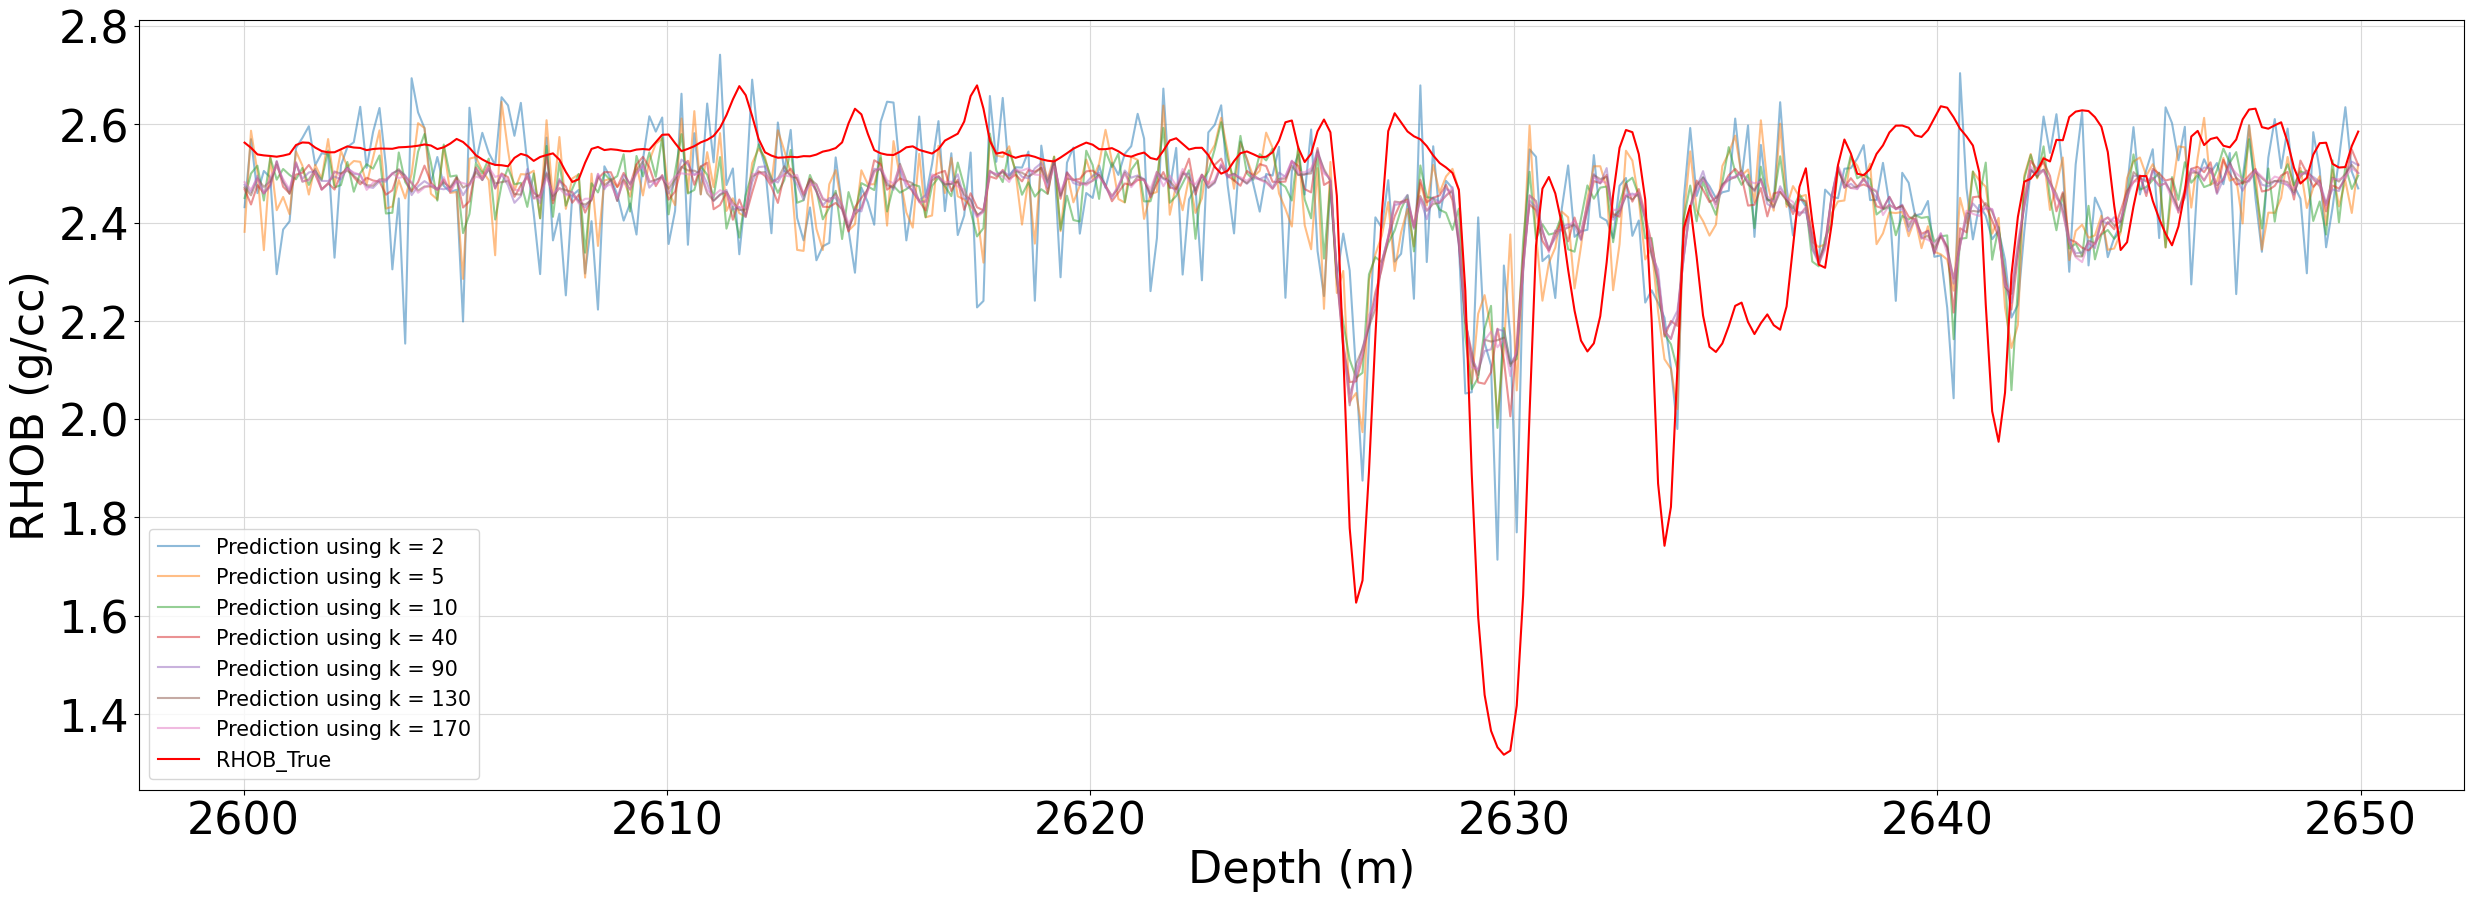

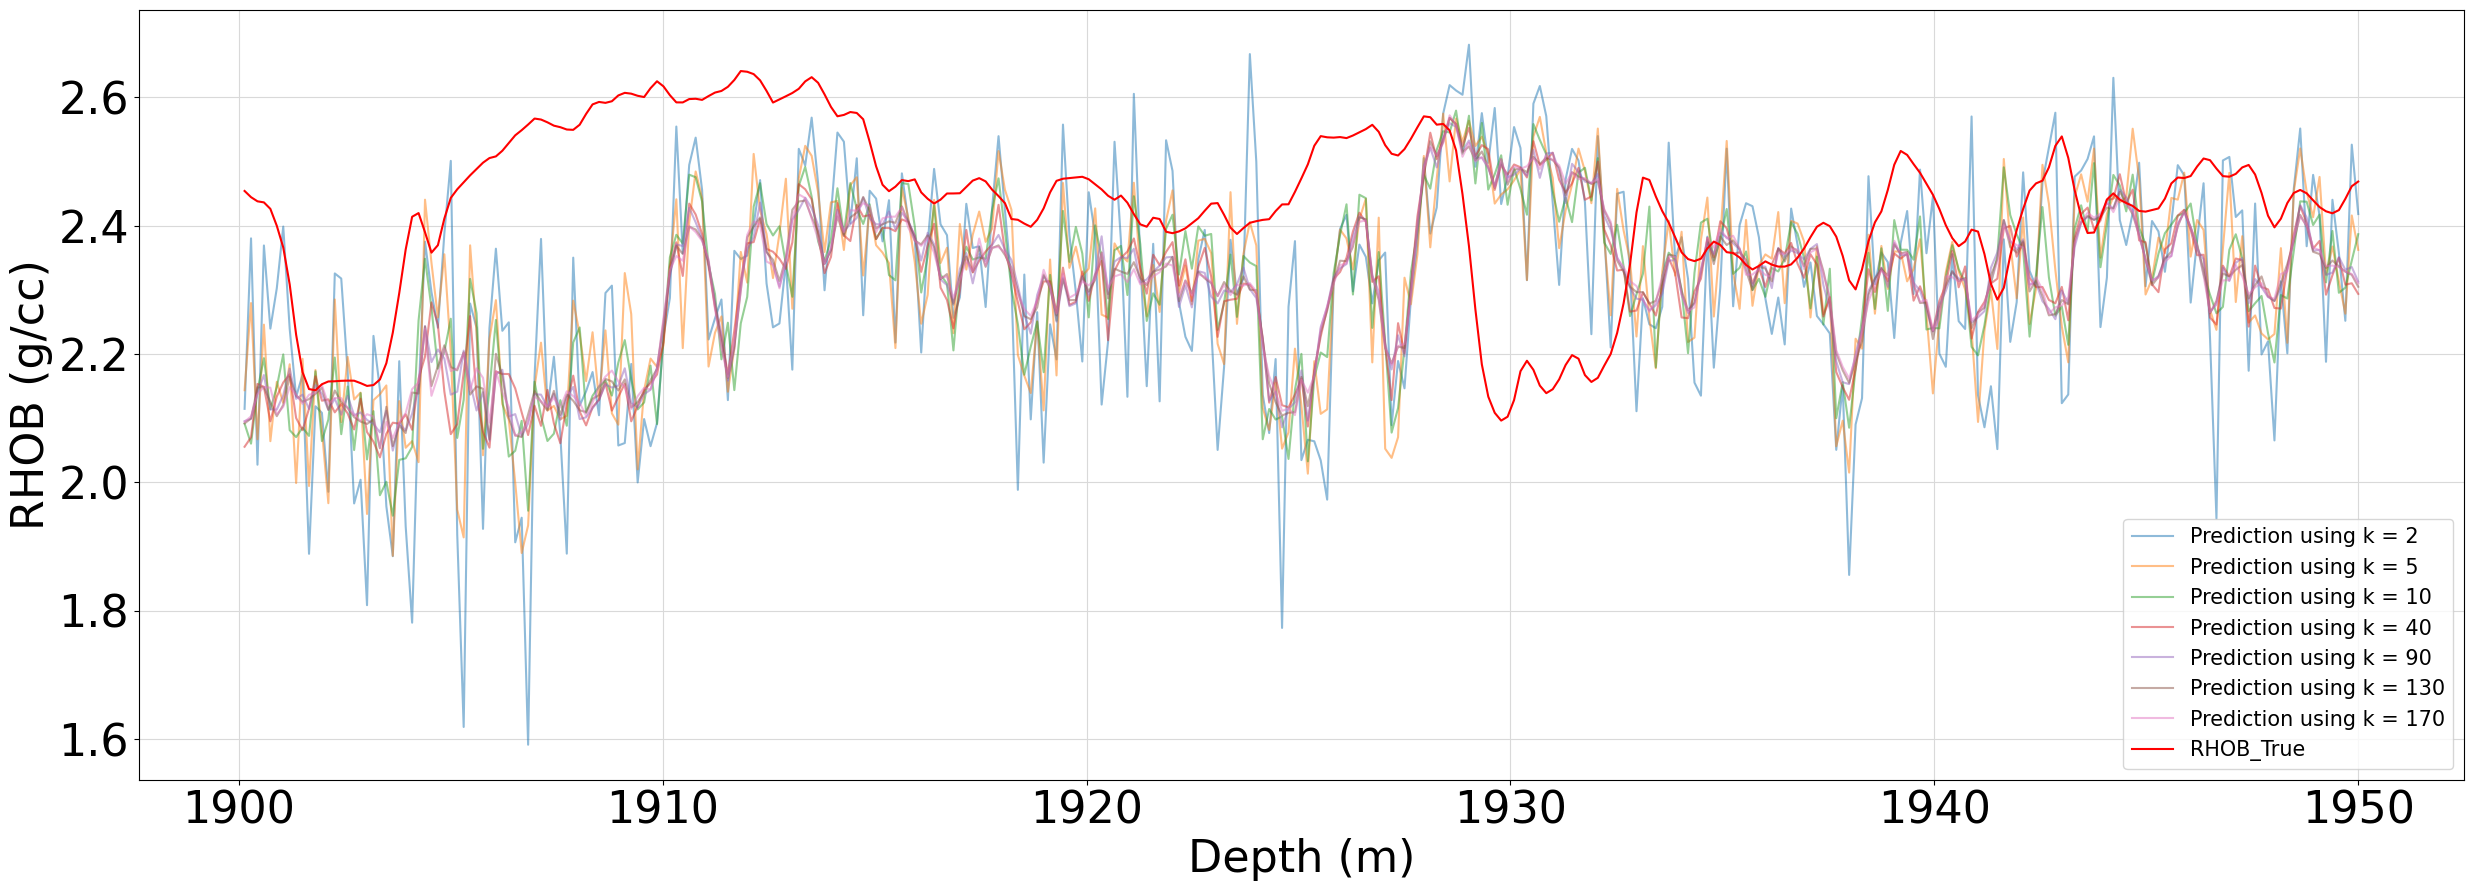

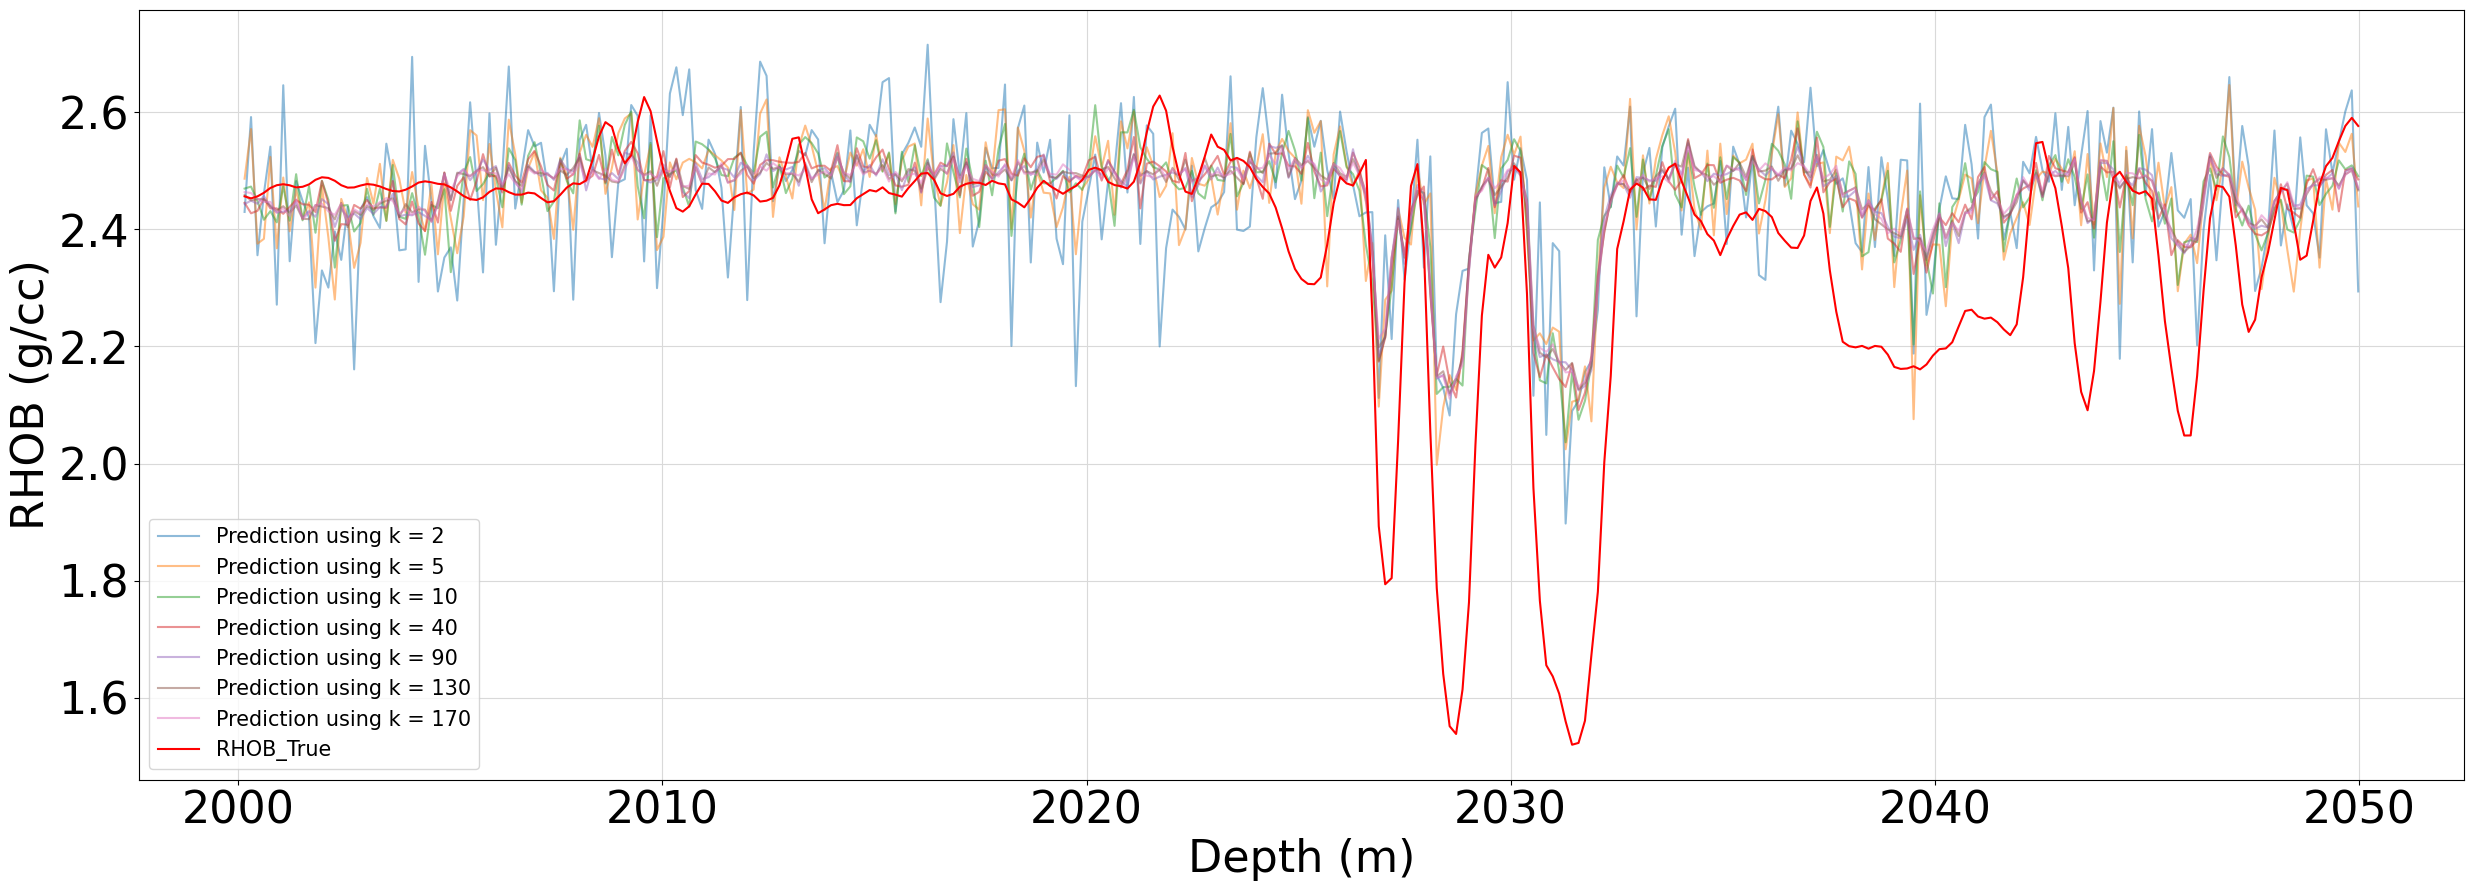

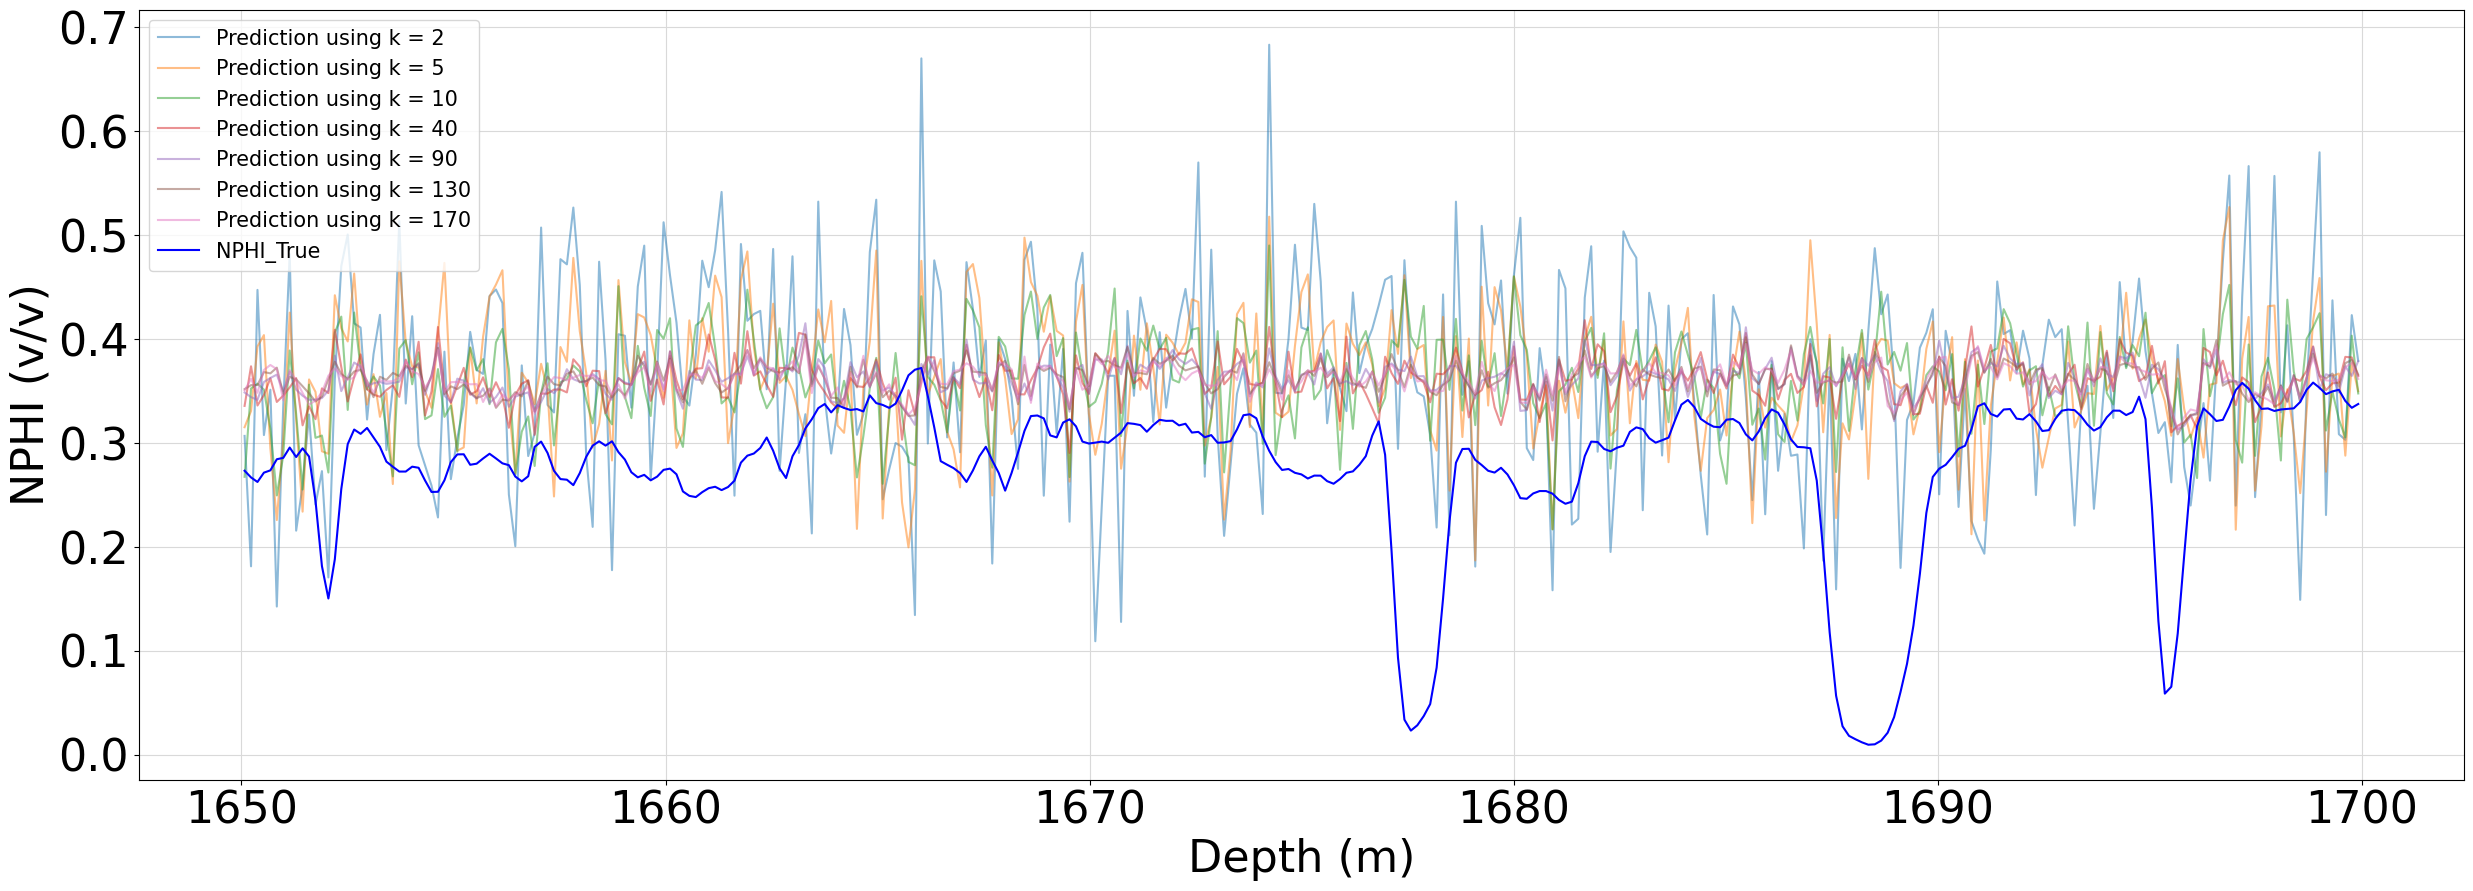

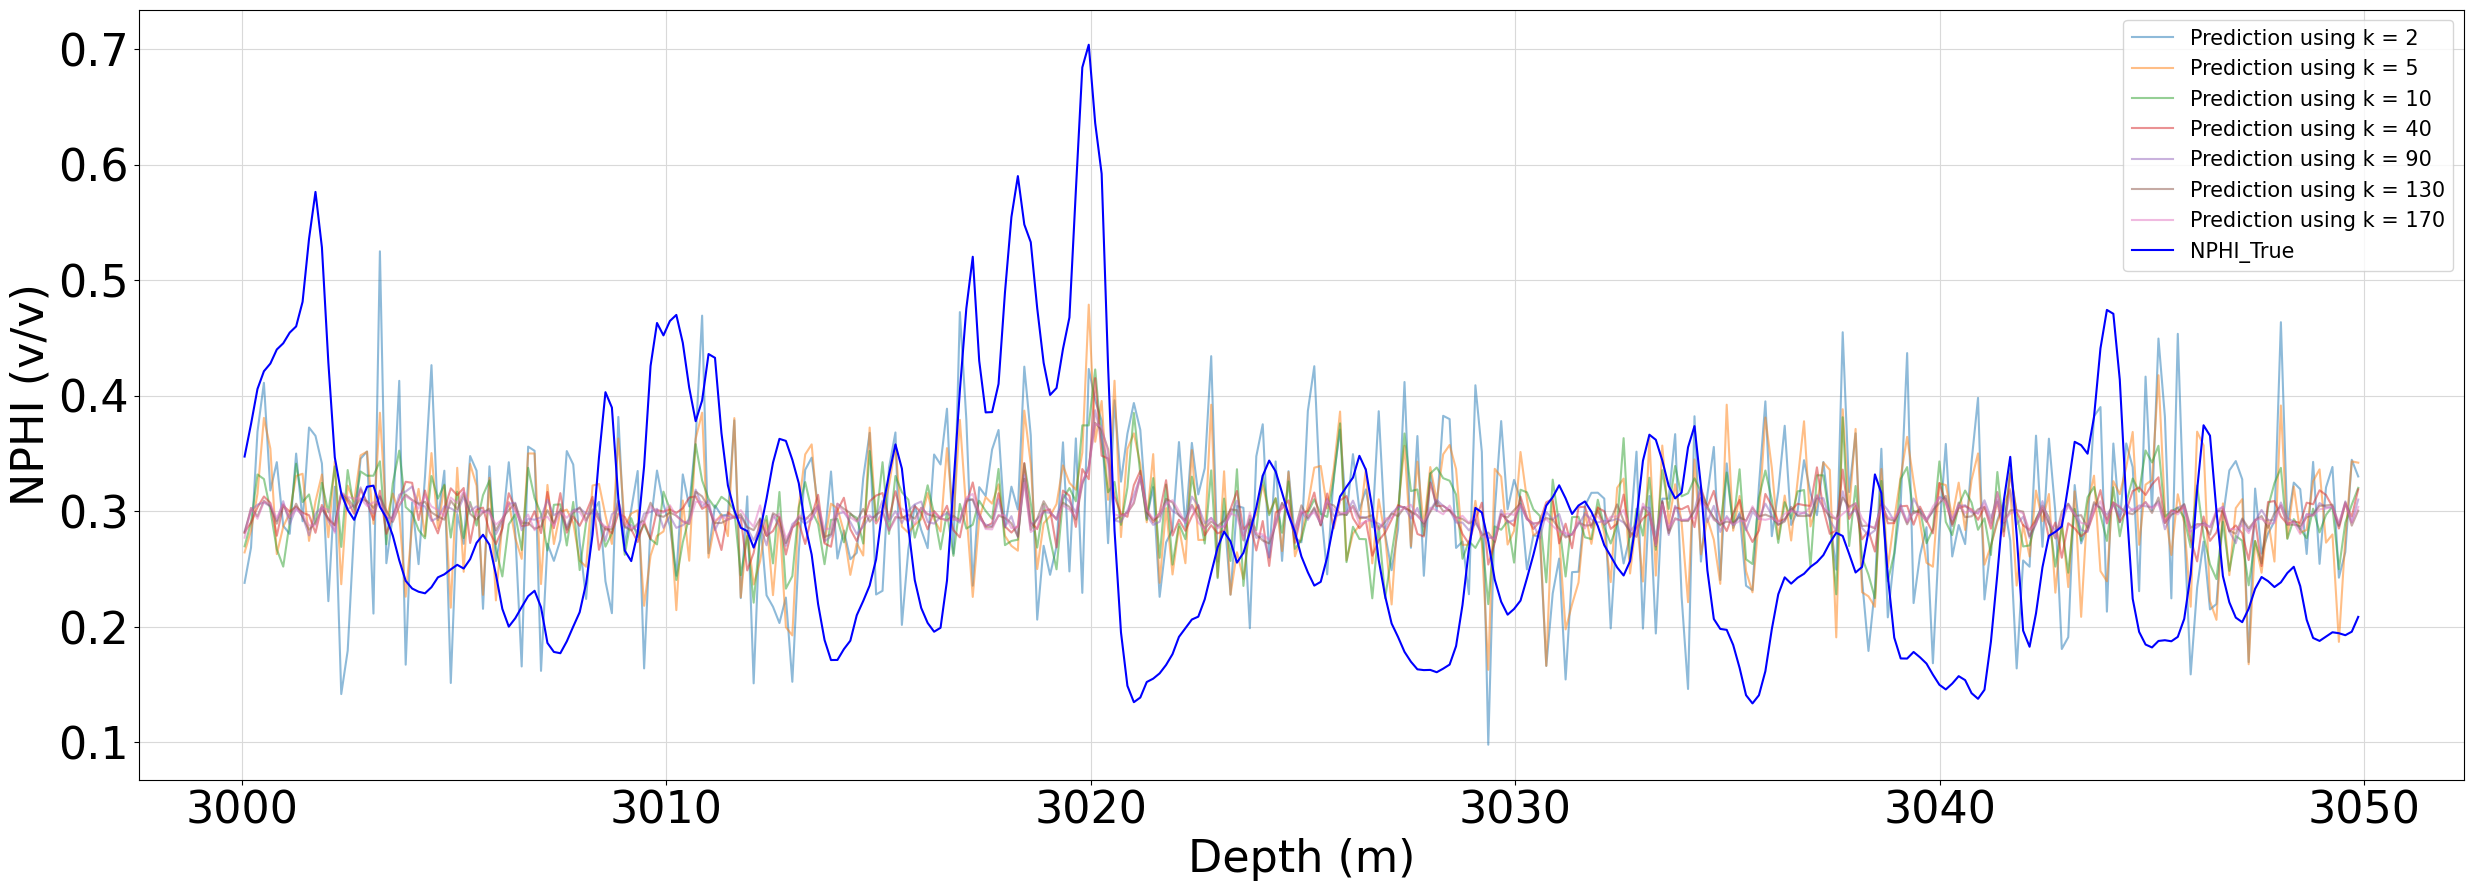

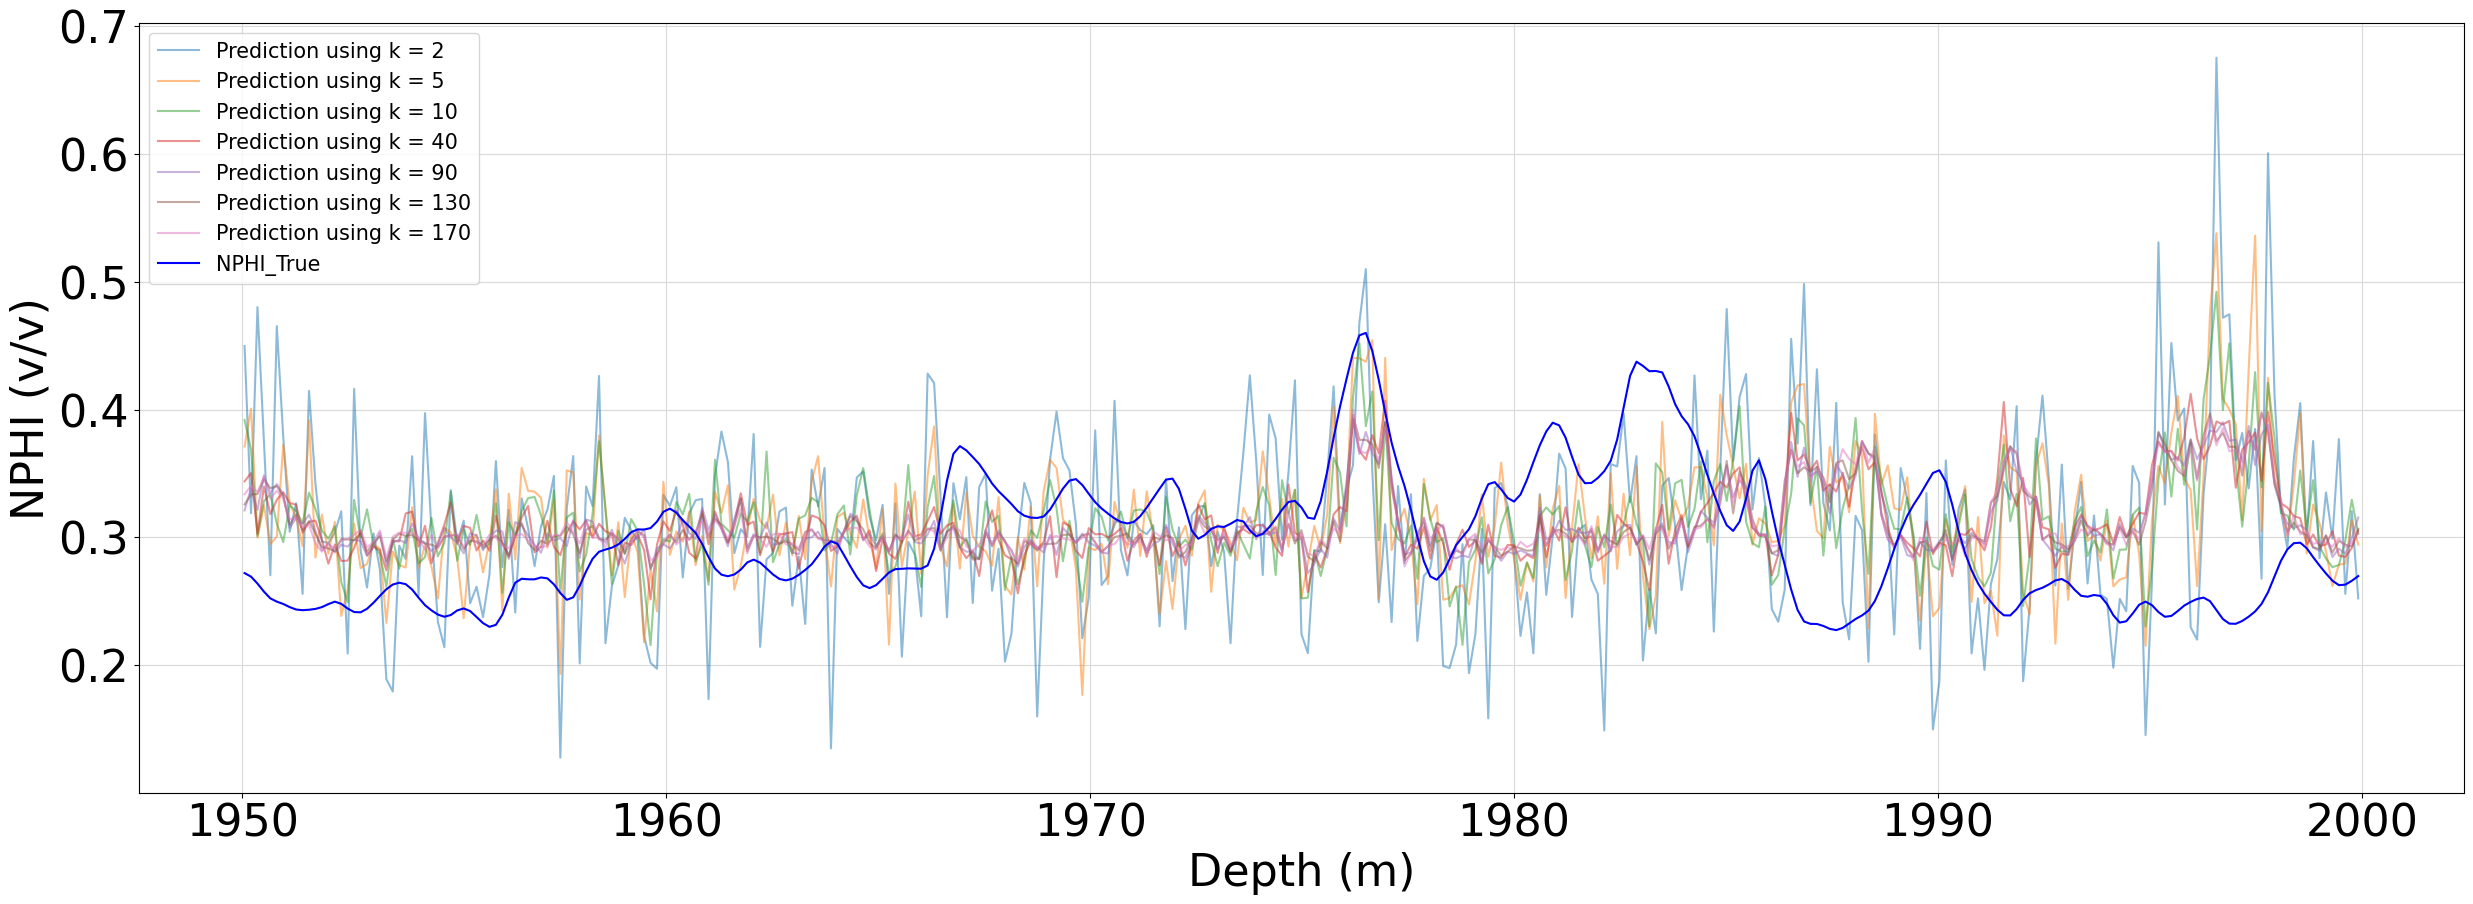

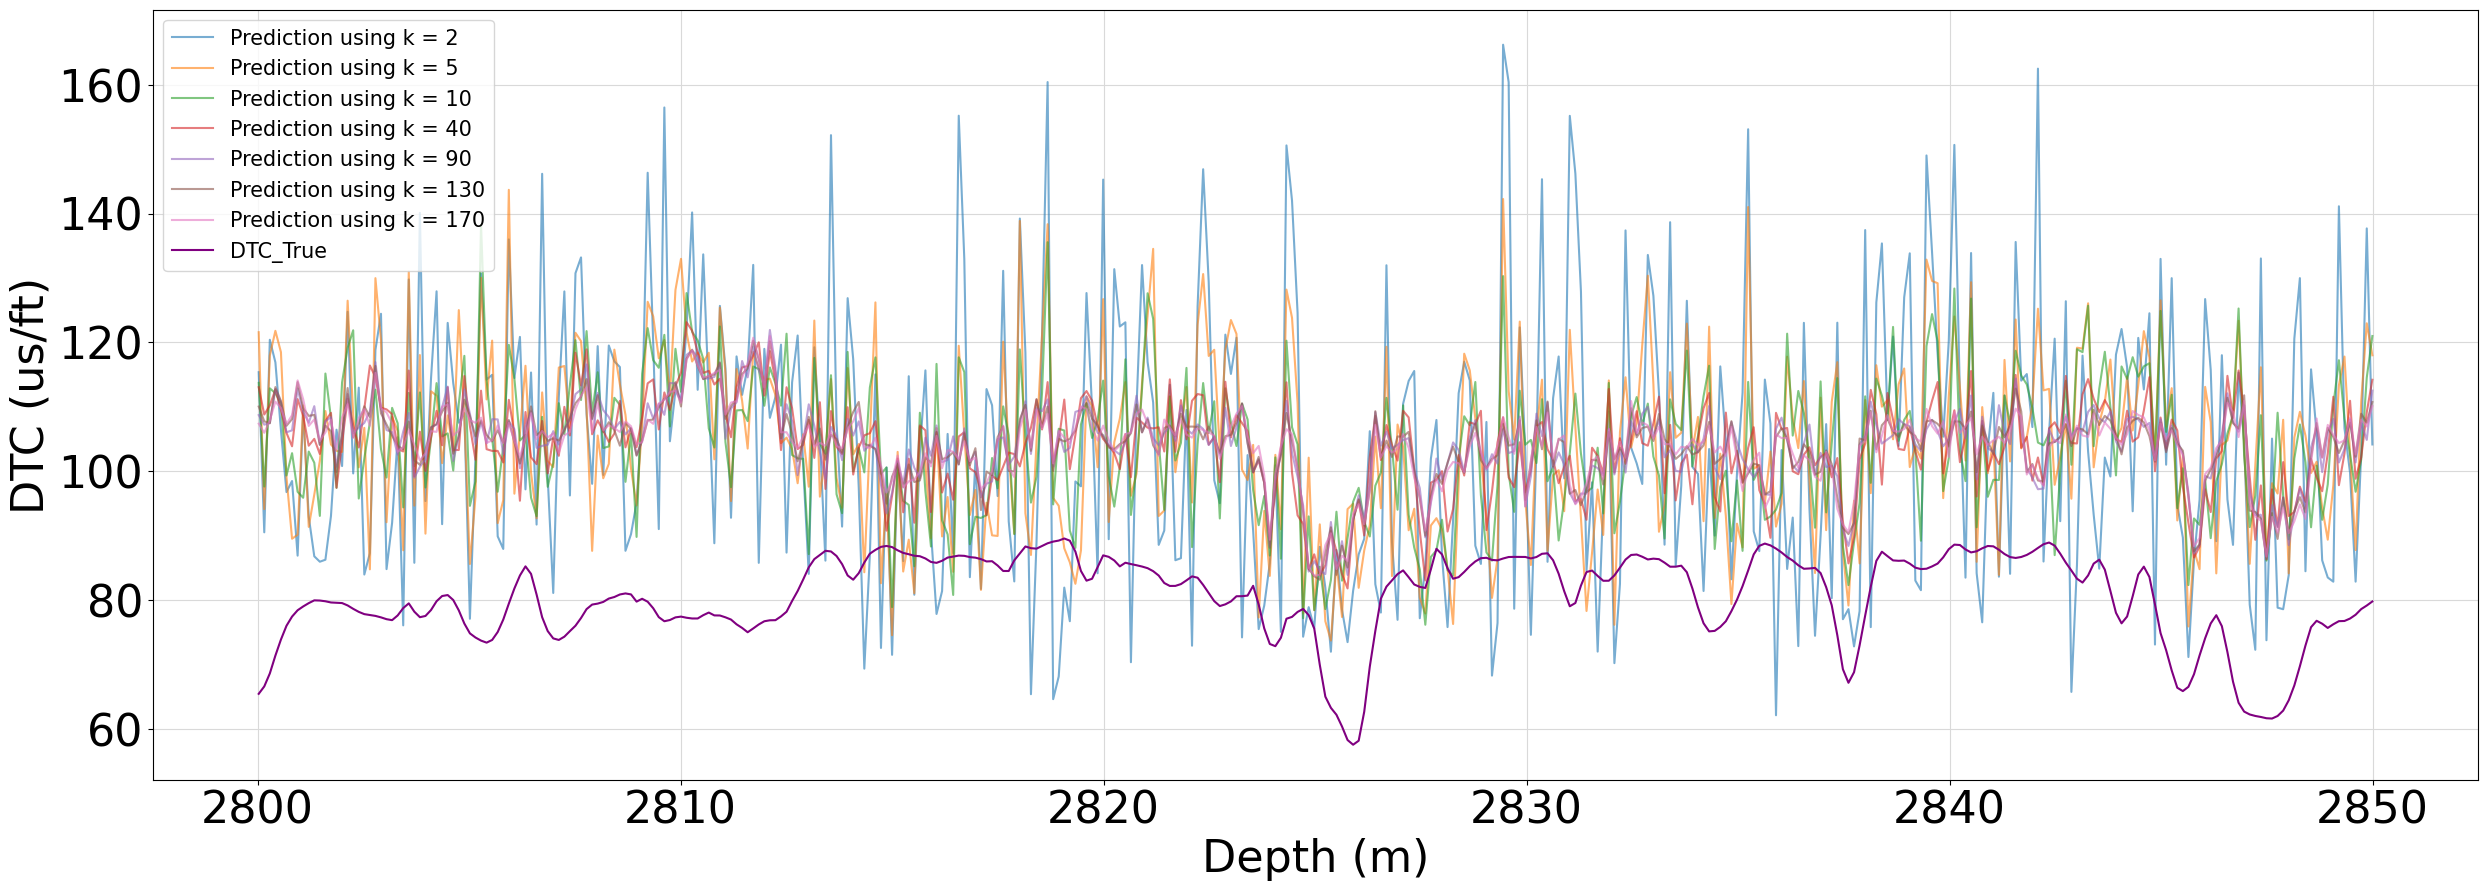

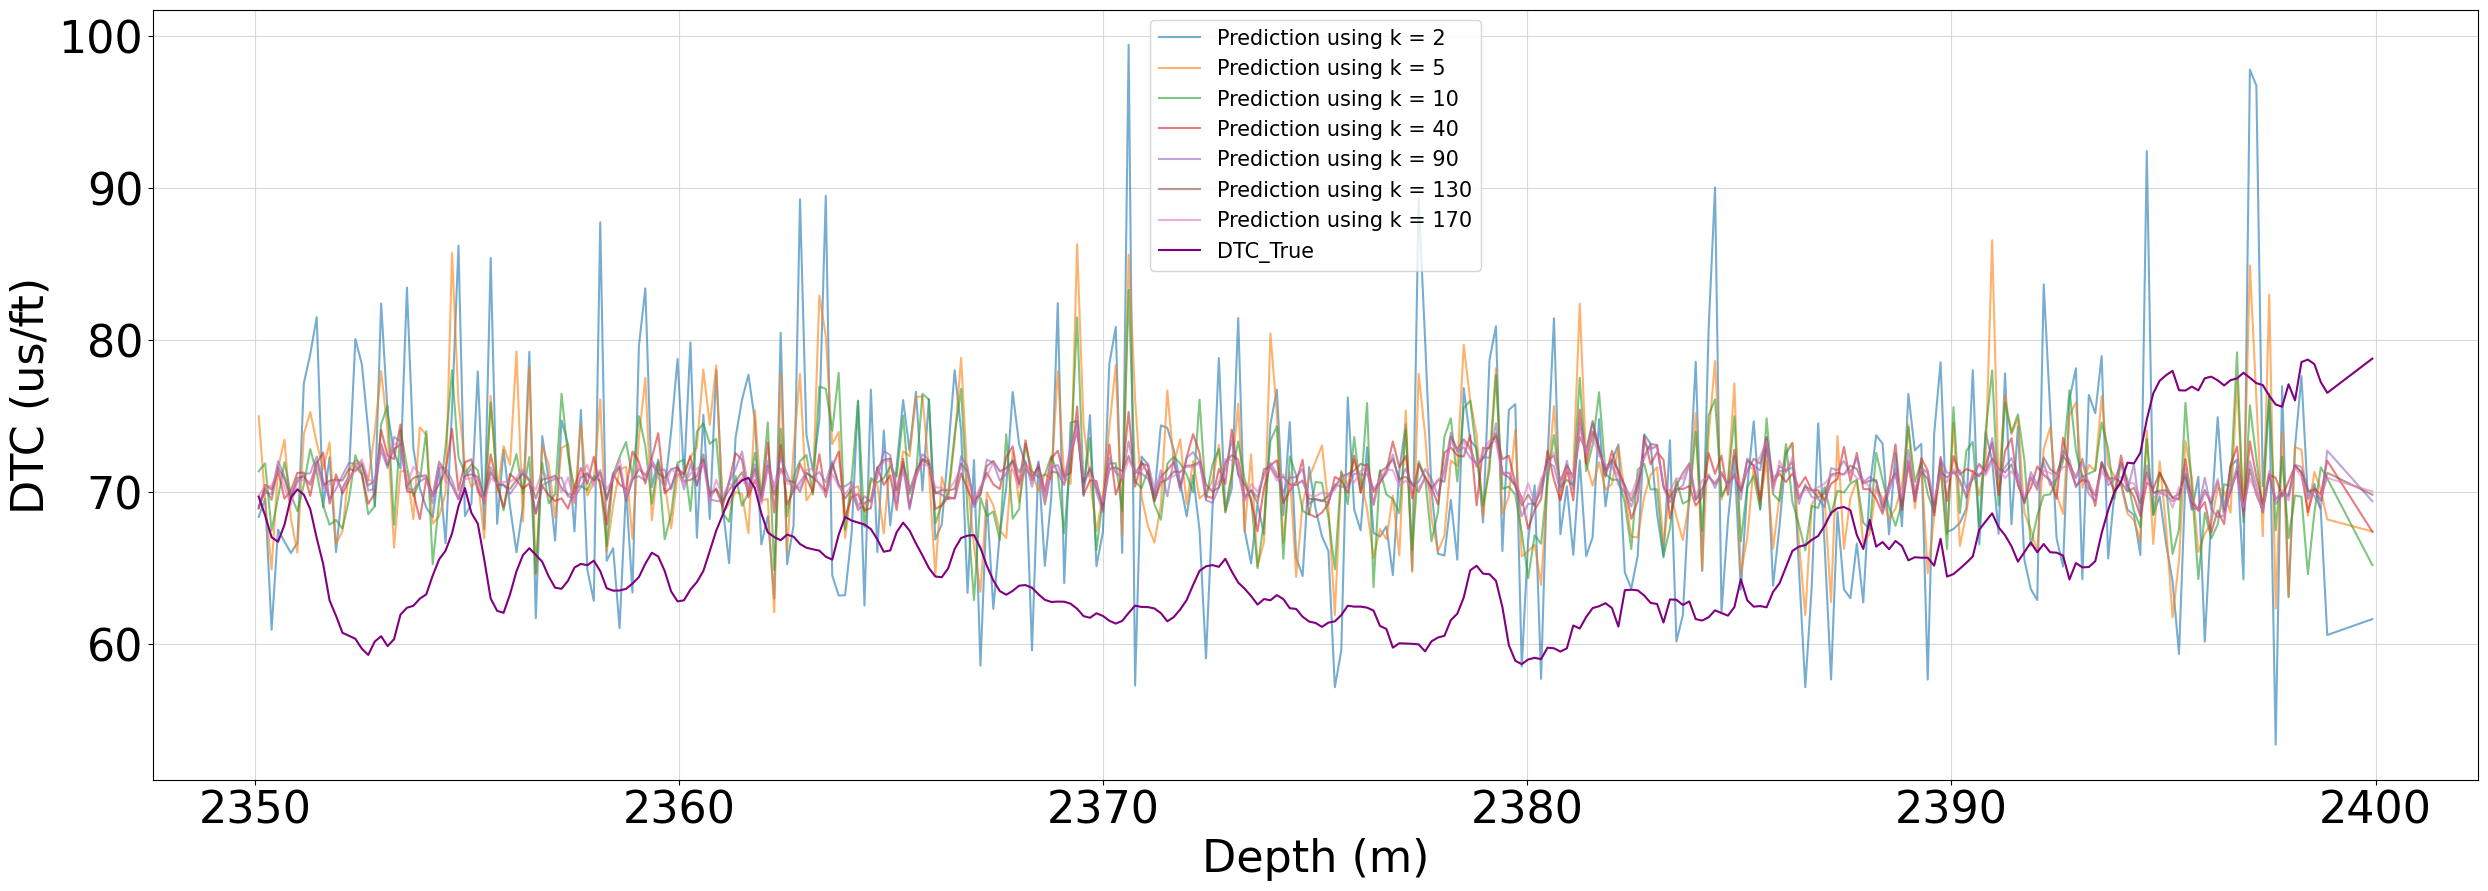

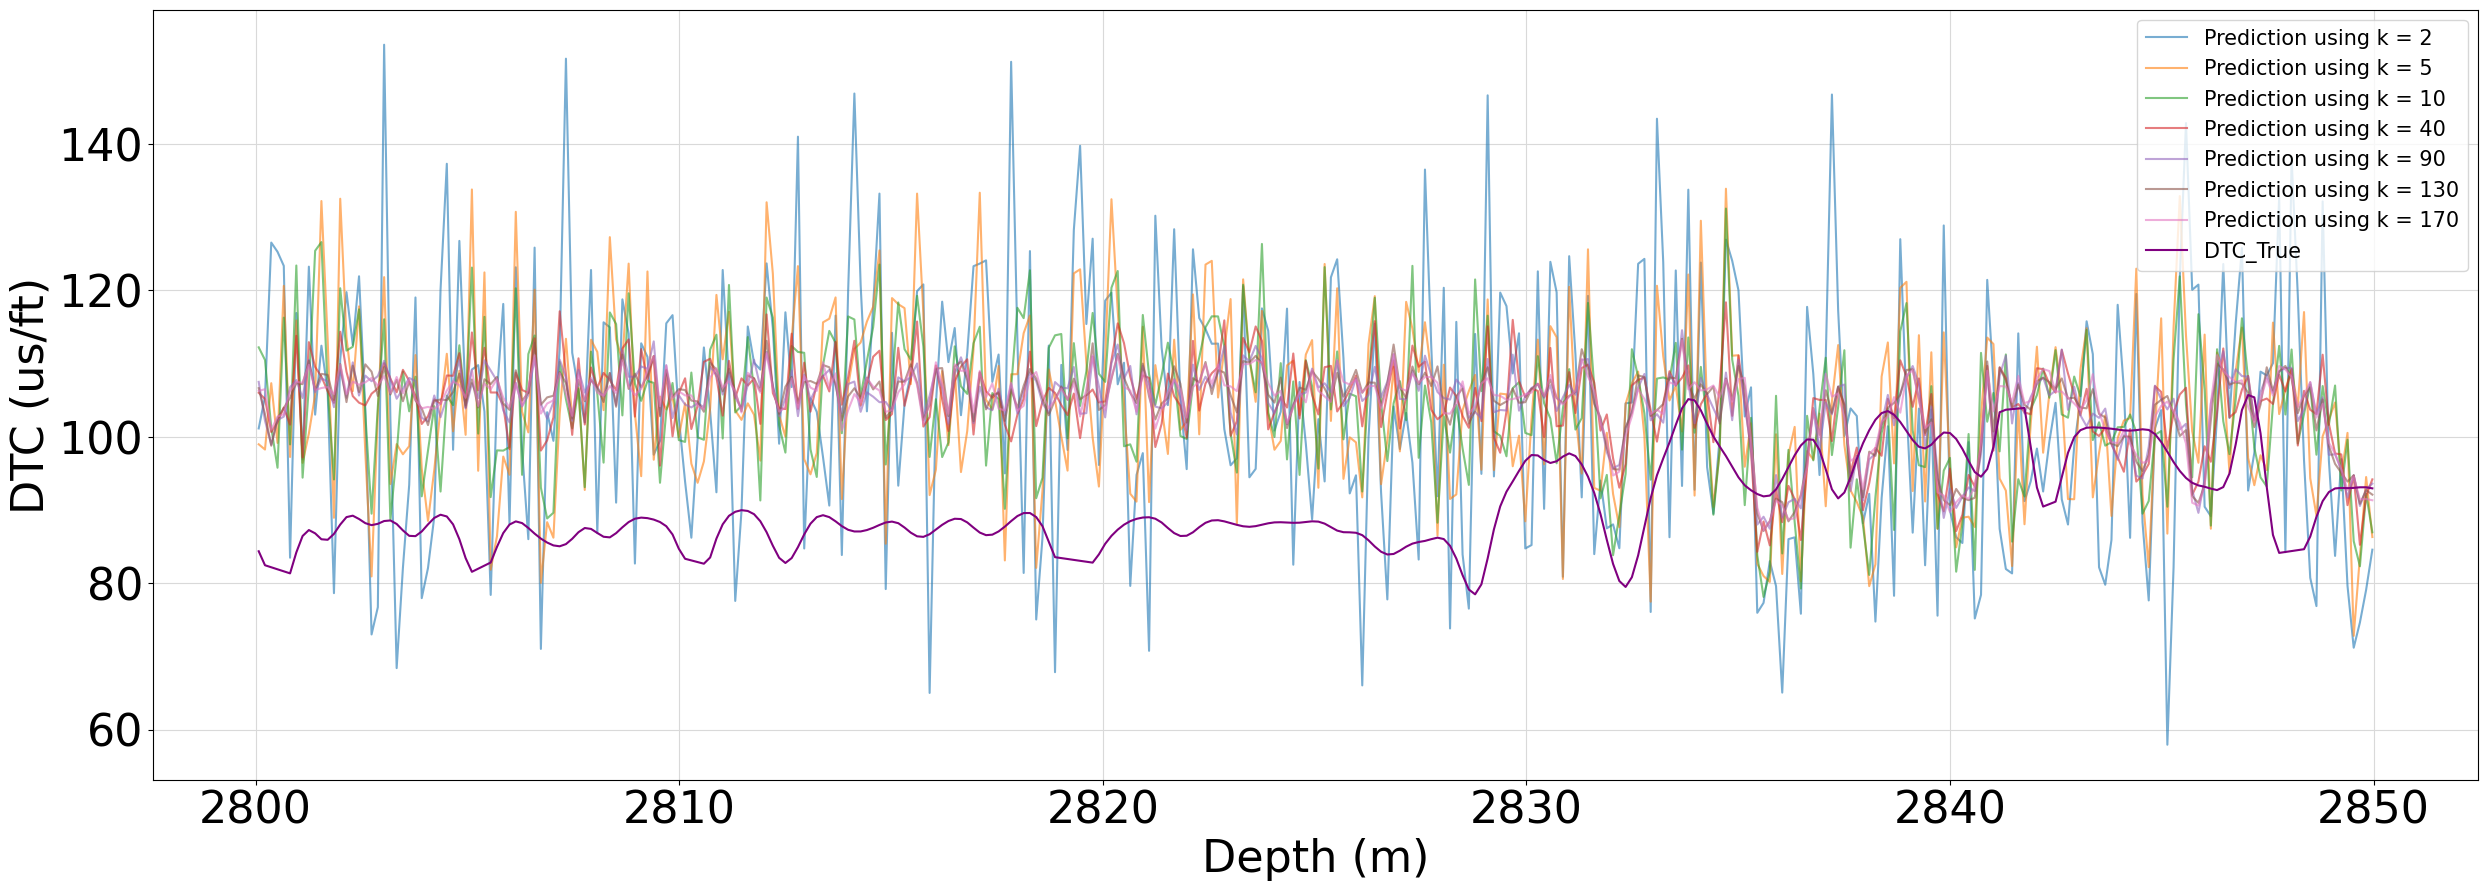

In [4]:
import gc #prevent memory loss

# RHOB Mulitple Cosine Sim Graph
RHOB_cs_df = df_feature_combine_dict['df_RHOB'][df_feature_combine_dict['df_RHOB'].filter(like='RHOB_').columns.tolist()]
RHOB_cs_df['WELL'] = df_original_test['WELL']
RHOB_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
RHOB_cs_df['RHOB'] = df_original_test['RHOB']
RHOB_cs_df = RHOB_cs_df.loc[index_feature['index_RHOB']]

index = 1
for well in RHOB_cs_df.WELL.unique():
    RHOB_cs_df_single_well = RHOB_cs_df[RHOB_cs_df['WELL'] == well]
    plt.figure(figsize=(30, 10))
    for col in RHOB_cs_df_single_well.columns:
        if col in RHOB_cs_df_single_well.filter(like='RHOB_').columns.tolist():
            s = ''.join(filter(str.isdigit, col))
            plt.plot(RHOB_cs_df_single_well['DEPTH_TVD'], RHOB_cs_df_single_well[col], label='Prediction using k = %s'%(int(s)), alpha=0.5)
        elif col in ['RHOB']:
            plt.plot(RHOB_cs_df_single_well['DEPTH_TVD'], RHOB_cs_df_single_well[col], label='RHOB_True', color='r')

    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)
    plt.xlabel('Depth (m)', fontsize=32)
    plt.ylabel('RHOB (g/cc)', fontsize=32)
    plt.grid(axis='x', color='0.85')
    plt.grid(axis='y', color='0.85')
    plt.legend(fontsize=15)
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()
    index += 1


# NPHI Mulitple Cosine Sim Graph
NPHI_cs_df = df_feature_combine_dict['df_NPHI'][df_feature_combine_dict['df_NPHI'].filter(like='NPHI_').columns.tolist()]
NPHI_cs_df['WELL'] = df_original_test['WELL']
NPHI_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
NPHI_cs_df['NPHI'] = df_original_test['NPHI']
NPHI_cs_df = NPHI_cs_df.loc[index_feature['index_NPHI']]
index = 1
for well in NPHI_cs_df.WELL.unique():
    NPHI_cs_df_single_well = NPHI_cs_df[NPHI_cs_df['WELL'] == well]
    plt.figure(figsize=(30, 10))
    for col in NPHI_cs_df_single_well.columns:
        if col in NPHI_cs_df_single_well.filter(like='NPHI_').columns.tolist():
            s = ''.join(filter(str.isdigit, col))
            plt.plot(NPHI_cs_df_single_well['DEPTH_TVD'], NPHI_cs_df_single_well[col], label='Prediction using k = %s'%(int(s)), alpha=0.5)
        elif col in ['NPHI']:
            plt.plot(NPHI_cs_df_single_well['DEPTH_TVD'], NPHI_cs_df_single_well[col], label='NPHI_True', color='blue')

    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)
    plt.xlabel('Depth (m)', fontsize=32)
    plt.ylabel('NPHI (v/v)', fontsize=32)
    plt.grid(axis='x', color='0.85')
    plt.grid(axis='y', color='0.85')
    plt.legend(fontsize=15)
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()
    index += 1

    
# DTC Mulitple Cosine Sim Graph
DTC_cs_df = df_feature_combine_dict['df_DTC'][df_feature_combine_dict['df_DTC'].filter(like='DTC_').columns.tolist()]
DTC_cs_df['WELL'] = df_original_test['WELL']
DTC_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
DTC_cs_df['DTC'] = df_original_test['DTC']
DTC_cs_df = DTC_cs_df.loc[index_feature['index_DTC']]
index = 1
for well in DTC_cs_df.WELL.unique():
    DTC_cs_df_single_well = DTC_cs_df[DTC_cs_df['WELL'] == well]
    plt.figure(figsize=(30, 10))
    for col in DTC_cs_df_single_well.columns:
        if col in DTC_cs_df_single_well.filter(like='DTC_').columns.tolist():
            s = ''.join(filter(str.isdigit, col))
            plt.plot(DTC_cs_df_single_well['DEPTH_TVD'], DTC_cs_df_single_well[col], label='Prediction using k = %s'%(int(s)), alpha=0.6)
        elif col in ['DTC']:
            plt.plot(DTC_cs_df_single_well['DEPTH_TVD'], DTC_cs_df_single_well[col], label='DTC_True', color='purple')

    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)
    plt.xlabel('Depth (m)', fontsize=32)
    plt.ylabel('DTC (us/ft)', fontsize=32)
    plt.grid(axis='x', color='0.85')
    plt.grid(axis='y', color='0.85')
    plt.legend(fontsize=15)
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()
    index += 1

# RMSE Visualization

Run previous cells to active the following code

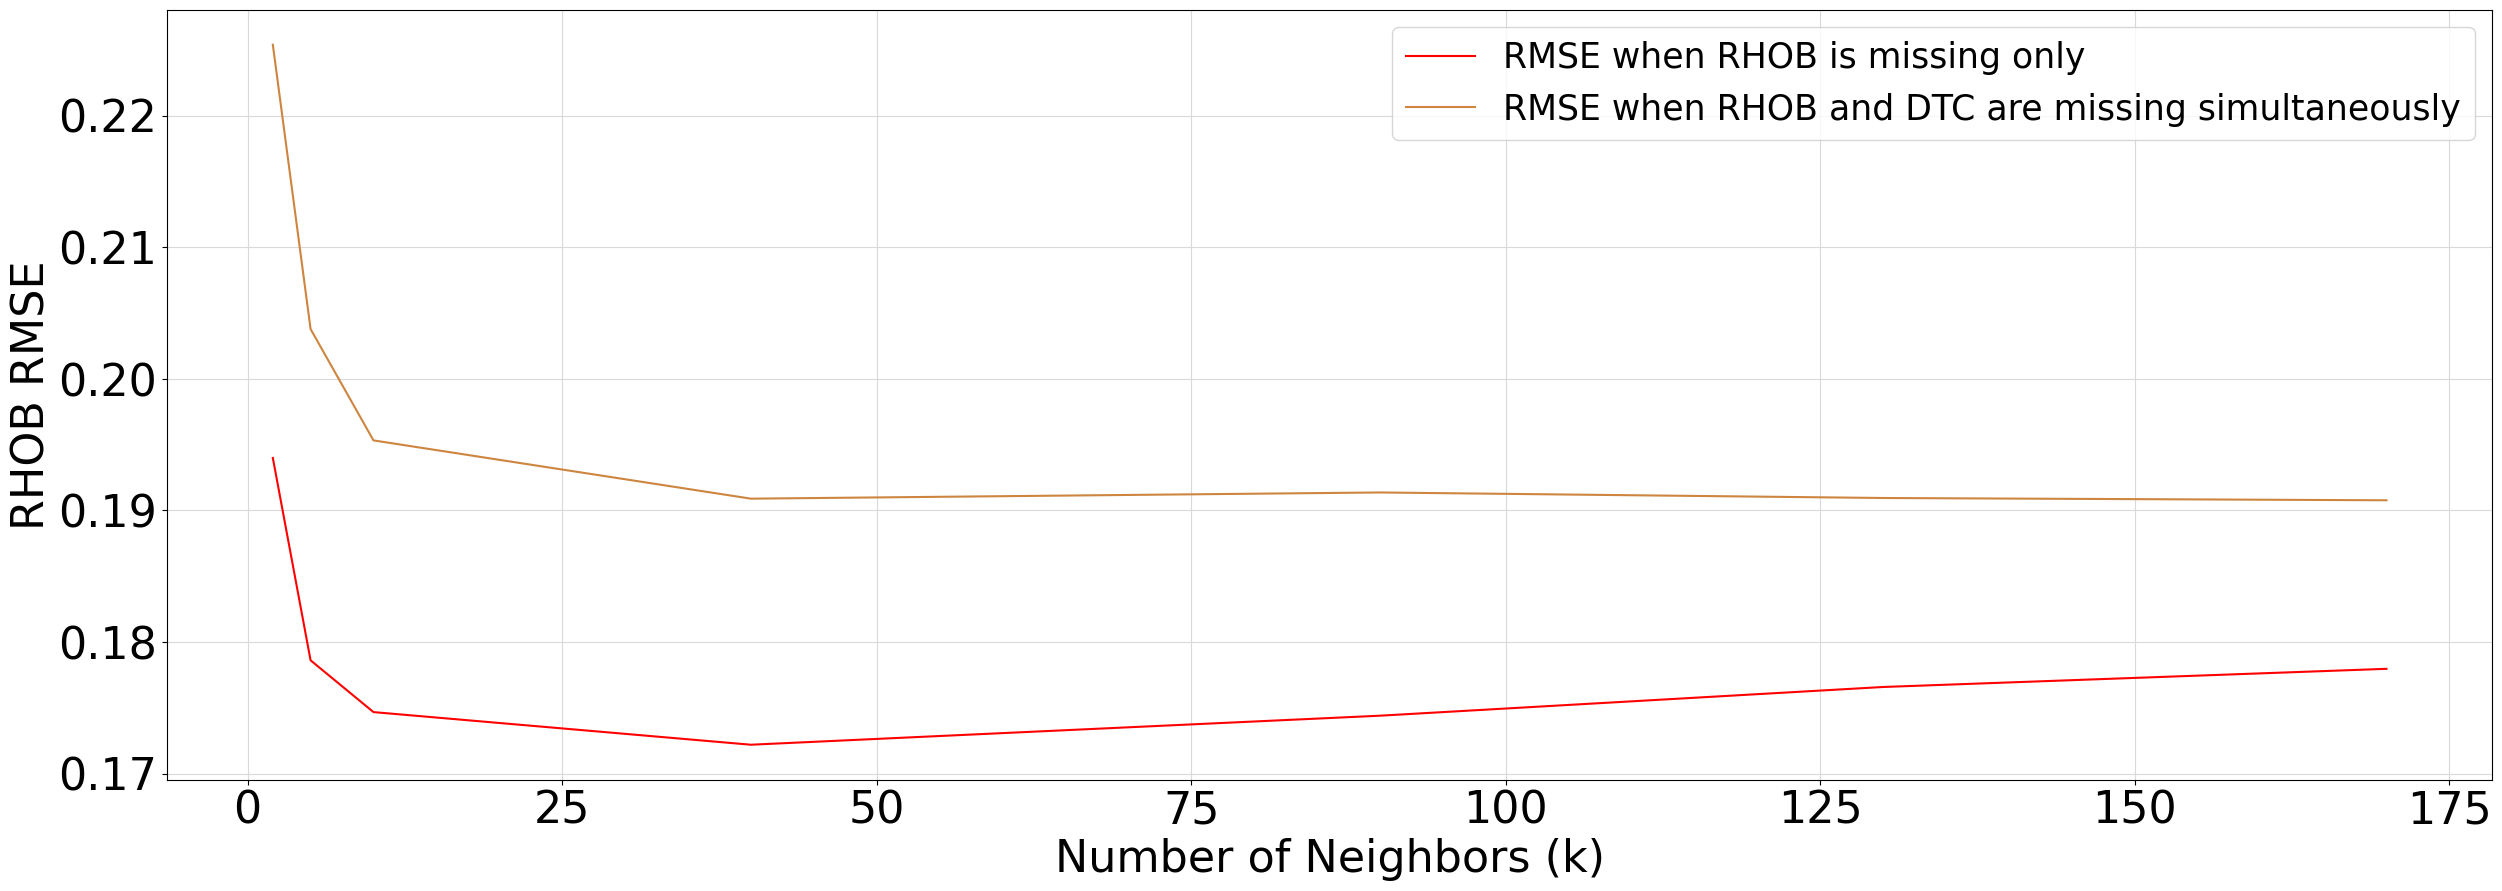

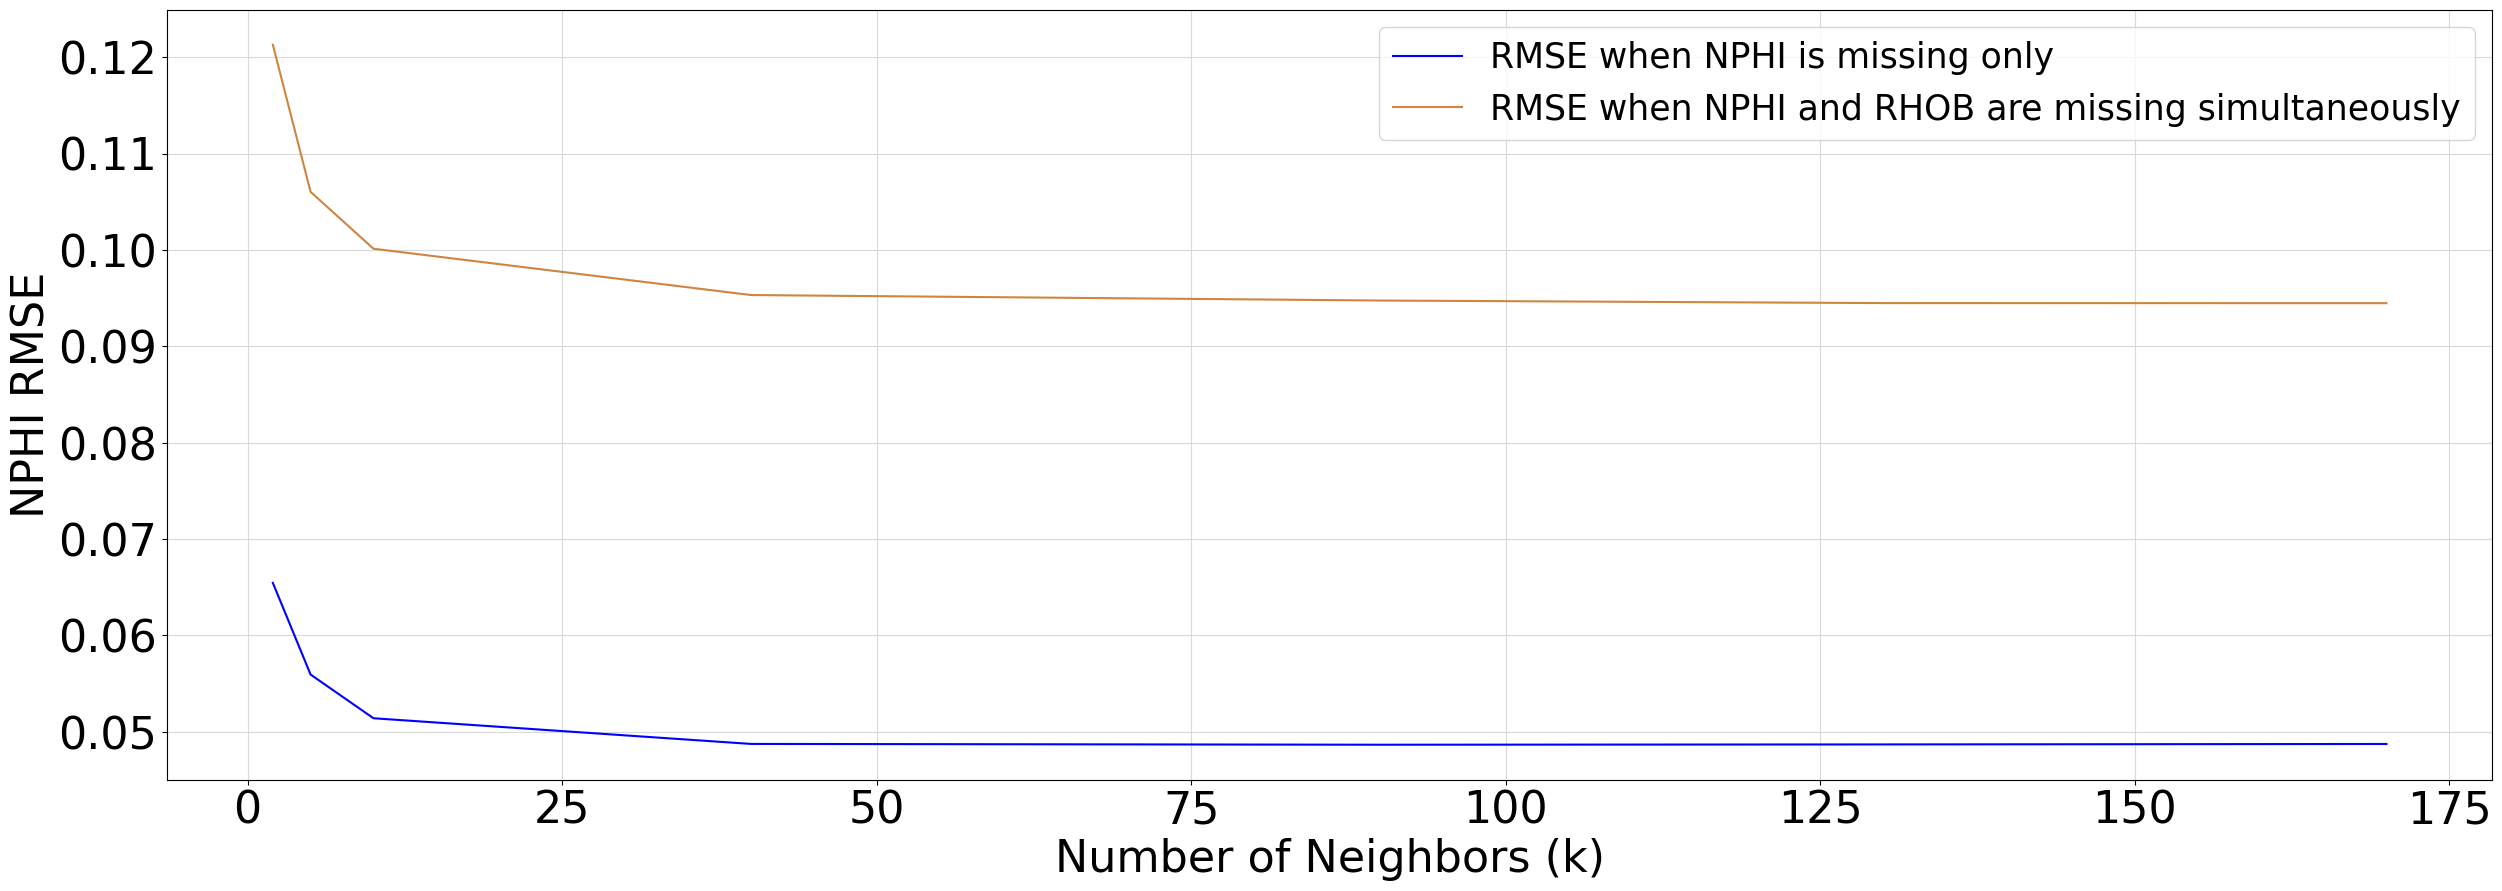

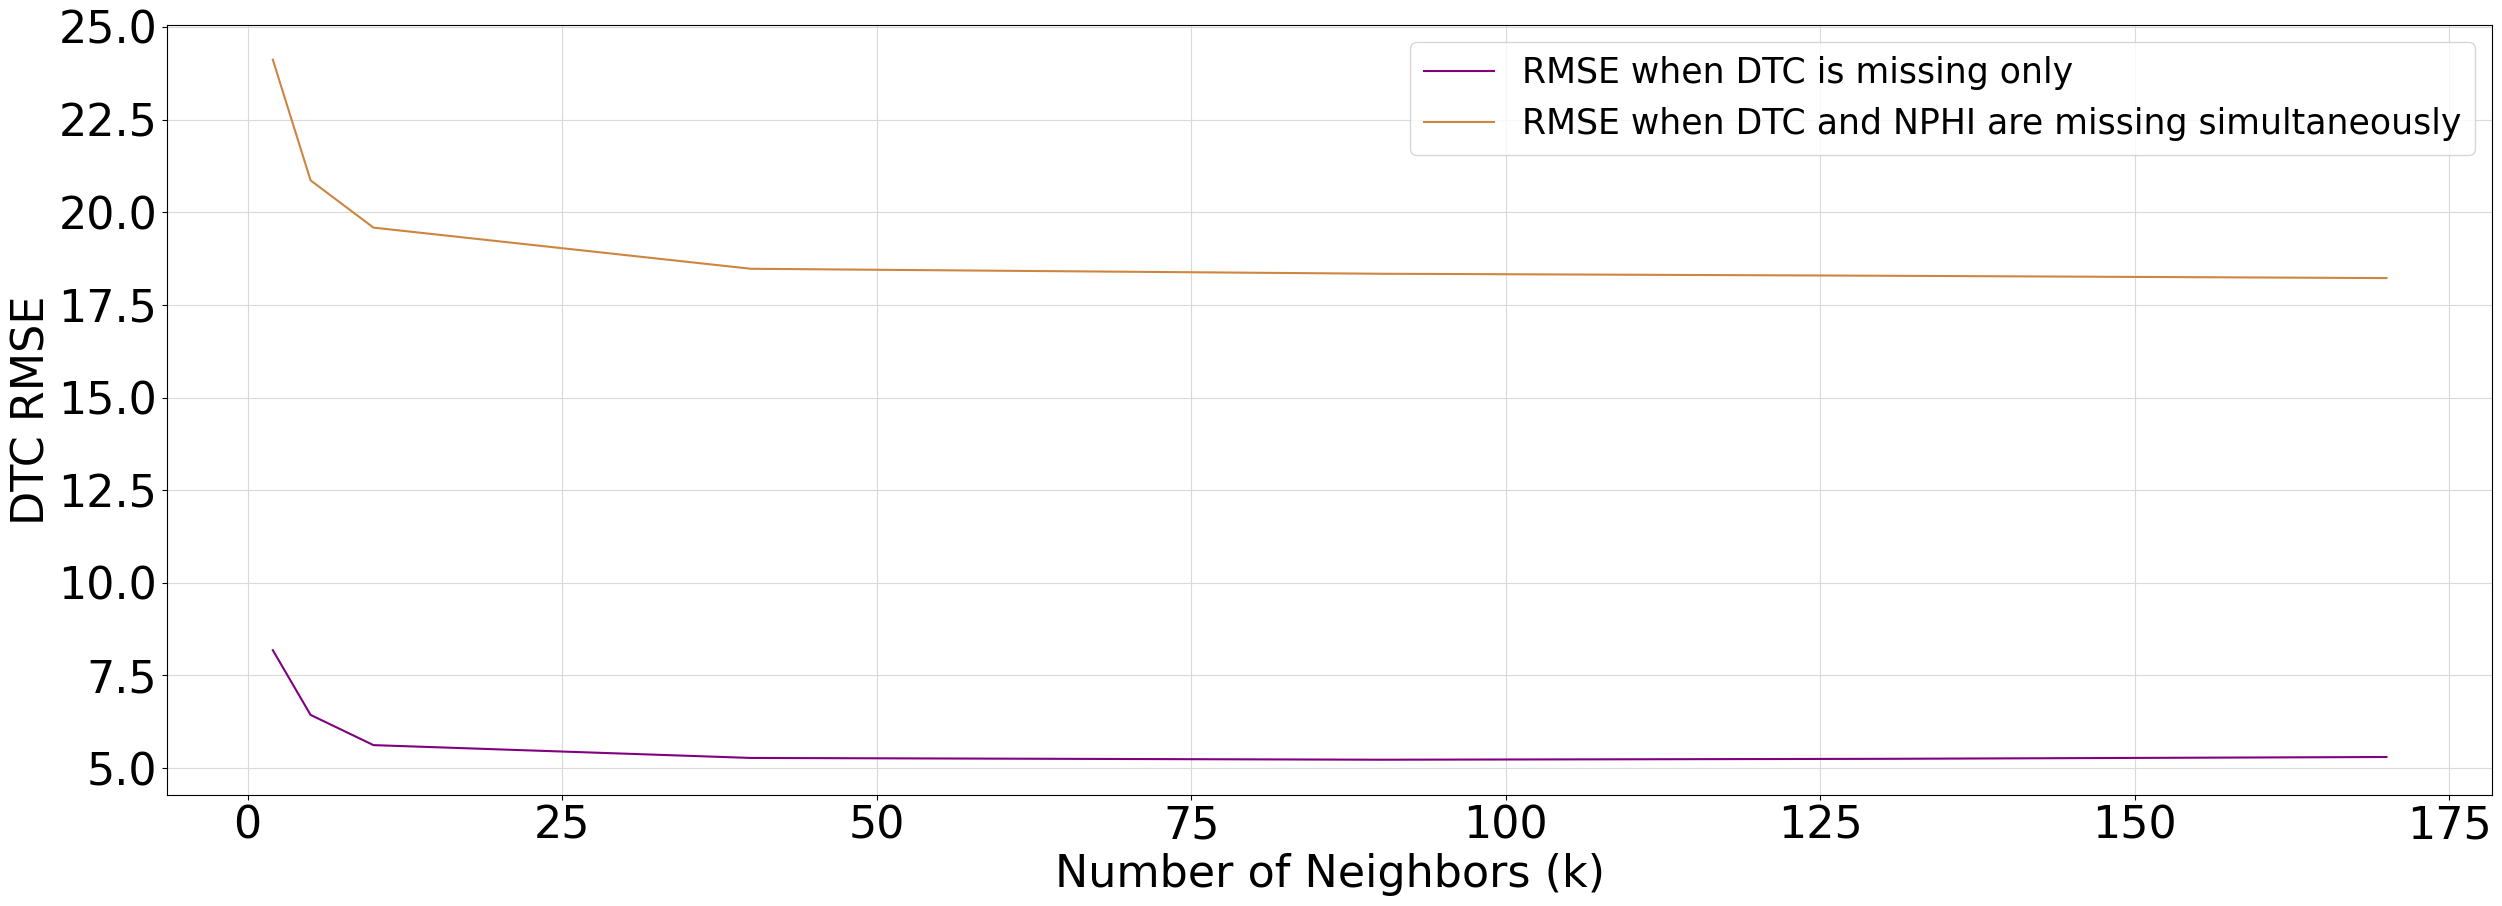

4002

In [5]:
from sklearn.metrics import mean_squared_error
import gc #prevent memory loss

# RHOB Mulitple Cosine Sim Graph
RHOB_cs_df = df_feature_combine_dict['df_RHOB'][df_feature_combine_dict['df_RHOB'].filter(like='RHOB_').columns.tolist()]
RHOB_cs_df['WELL'] = df_original_test['WELL']
RHOB_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
RHOB_cs_df['RHOB'] = df_original_test['RHOB']
RHOB_cs_df = RHOB_cs_df.loc[index_feature['index_RHOB']]

rmse_list = []
for col in RHOB_cs_df.columns:
    if col not in ['WELL', 'DEPTH_TVD', 'RHOB']:
        rmse = mean_squared_error(RHOB_cs_df['RHOB'].values, RHOB_cs_df[col].values, squared = False)
        rmse_list.append(rmse)

# Import RMSE when single log is missing
rhob_rmse = pd.read_csv('RHOB_RMSE.csv')
        
plt.figure(figsize=(30, 10))
plt.plot(NN_list, rhob_rmse['RMSE'], color='r', label='RMSE when RHOB is missing only')
plt.plot(NN_list, rmse_list, color='peru', label='RMSE when RHOB and DTC are missing simultaneously')
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel('Number of Neighbors (k)', fontsize=32)
plt.ylabel('RHOB RMSE', fontsize=32)
plt.legend(fontsize=25)
plt.grid(axis='x', color='0.85')
plt.grid(axis='y', color='0.85')
plt.show()
plt.clf()
plt.close('all')
gc.collect()


# NPHI Mulitple Cosine Sim Graph
NPHI_cs_df = df_feature_combine_dict['df_NPHI'][df_feature_combine_dict['df_NPHI'].filter(like='NPHI_').columns.tolist()]
NPHI_cs_df['WELL'] = df_original_test['WELL']
NPHI_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
NPHI_cs_df['NPHI'] = df_original_test['NPHI']
NPHI_cs_df = NPHI_cs_df.loc[index_feature['index_NPHI']]

rmse_list = []
for col in NPHI_cs_df.columns:
    if col not in ['WELL', 'DEPTH_TVD', 'NPHI']:
        rmse = mean_squared_error(NPHI_cs_df['NPHI'].values, NPHI_cs_df[col].values, squared = False)
        rmse_list.append(rmse)

# Import RMSE when single log is missing
nphi_rmse = pd.read_csv('NPHI_RMSE.csv')
        
plt.figure(figsize=(30, 10))
plt.plot(NN_list, nphi_rmse['RMSE'], color='blue', label='RMSE when NPHI is missing only')
plt.plot(NN_list, rmse_list, color='peru', label='RMSE when NPHI and RHOB are missing simultaneously')
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel('Number of Neighbors (k)', fontsize=32)
plt.ylabel('NPHI RMSE', fontsize=32)
plt.legend(fontsize=25)
plt.grid(axis='x', color='0.85')
plt.grid(axis='y', color='0.85')
plt.show()
plt.clf()
plt.close('all')
gc.collect()


# DTC Mulitple Cosine Sim Graph
DTC_cs_df = df_feature_combine_dict['df_DTC'][df_feature_combine_dict['df_DTC'].filter(like='DTC_').columns.tolist()]
DTC_cs_df['WELL'] = df_original_test['WELL']
DTC_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
DTC_cs_df['DTC'] = df_original_test['DTC']
DTC_cs_df = DTC_cs_df.loc[index_feature['index_DTC']]

rmse_list = []
for col in DTC_cs_df.columns:
    if col not in ['WELL', 'DEPTH_TVD', 'DTC']:
        rmse = mean_squared_error(DTC_cs_df['DTC'].values, DTC_cs_df[col].values, squared = False)
        rmse_list.append(rmse)

# Import RMSE when single log is missing
dtc_rmse = pd.read_csv('DTC_RMSE.csv')
        
plt.figure(figsize=(30, 10))
plt.plot(NN_list, dtc_rmse['RMSE'], color='purple', label='RMSE when DTC is missing only')
plt.plot(NN_list, rmse_list, color='peru', label='RMSE when DTC and NPHI are missing simultaneously')
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel('Number of Neighbors (k)', fontsize=32)
plt.ylabel('DTC RMSE', fontsize=32)
plt.legend(fontsize=25)
plt.grid(axis='x', color='0.85')
plt.grid(axis='y', color='0.85')
plt.show()
plt.clf()
plt.close('all')
gc.collect()